# Tensorflow Regression Neural Network

## Libraries

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data
Let's create some random data, in order to have a big dataset(1 milion instances)

In [4]:
x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

y = mx + b

b = 5 

Let's create a dataframe

In [6]:
# Labels
y_true = (0.5 * x_data) + 5 + noise

In [7]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [10]:
my_data= pd.concat([x_df,y_df], axis=1)
my_data.head()

,X Data,Y
0,0.00000,3.998144
1,0.00001,4.766735
2,0.00002,1.715173
3,0.00003,6.017836
4,0.00004,5.181628


We created a dataframe so that we can plot them easily, since we have lot of points. Using the standard `plt.plot()` on one milion point can take too much time. In this way instead, we can randomly sample 250 points and plot them

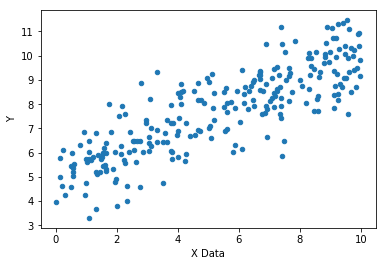

In [12]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [13]:
batch_size = 8

## Variables
Let's create the 2 variables we need and initialize them with two random numbers.

In [15]:
# m is our slope
m = tf.Variable(0.81)
b = tf.Variable(0.17)

## Placeholders

In [16]:
# X Data
x_ph = tf.placeholder(tf.float32, [batch_size])
# True Labels
y_ph = tf.placeholder(tf.float32, [batch_size])

## Operations

In [18]:
# Prediction
y_hat = m*x_ph + b

error = tf.reduce_sum(tf.square(y_ph-y_hat))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

## Session

In [24]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    batches=10000
    
    # We will feed 1000 batches each one of 8 points, grabbed in a random way
    for i in range(batches):
        
        # Grab 8 random points
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        # Feed dictionary
        feed = {x_ph: x_data[rand_ind], y_ph: y_true[rand_ind]}
        
        # Train Network
        sess.run(train, feed_dict = feed)
    
    # Let's grab our results
    model_m, model_b = sess.run([m,b])

In [25]:
model_m

0.53400767

In [26]:
model_b

5.0239706

## Plot

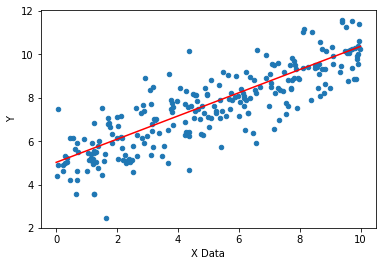

In [27]:
# Prediction
y_hat = x_data * model_m + model_b

my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')

As we can see we obtained a good linear fit